In [ ]:
! pip install qiskit

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange

In [ ]:
class Agent:
    def __init__(self, n_anctions, epsilon_0=0, Tf=0.125, To=5, tau = 10000):
        self.To = To
        self.Tf = Tf
        self.tau = tau
        self.epsilon_0 = epsilon_0
        self.indices = np.arange(n_anctions)

    def reset(self, q_initial = None):
        if q_initial:
          self.q_estimation = q_initial
        self.q_estimation = np.zeros(len(self.indices)) + 10
        self.action_count = np.zeros(len(self.indices))
        return np.random.choice(self.indices)

    def act(self, t):
        self.Tb = self.Tf + (self.To - self.Tf) * np.power(np.e, -t/self.tau)
        if np.random.rand() < self.epsilon_0:
            return np.random.choice(self.indices)   
        if self.Tb < 0.0125:
          q_best = np.max(self.q_estimation)
          return np.random.choice(np.where(self.q_estimation == q_best)[0])
        exp_est = np.exp(self.q_estimation / self.Tb)
        act_pro = exp_est / np.sum(exp_est)
        return np.random.choice(self.indices, p=act_pro)

    def step(self, action, reward):
        self.action_count[action] += 1      
        self.q_estimation[action] += (reward - self.q_estimation[action]) / self.action_count[action]
    
    def end(self): 
        if self.Tb == 0:
          act_pro = self.q_estimation/np.sum(self.q_estimation)
        else:
          exp_est = np.exp(self.q_estimation / self.Tb)
          act_pro = exp_est / np.sum(exp_est)
        return self.q_estimation, act_pro

In [ ]:
def classical_game_Nplayers(rotat):
  output = ""
  for i in rotat:
    output += str(int(i))
  return output, 0

In [ ]:
"""
def VQC_QGT_2players(rotat):
  c = np.rint([rotat[0][0] / (np.pi/4), 
               rotat[0][1] / (np.pi/4), 
               rotat[0][2] / (np.pi/4), 
               rotat[1][0] / (np.pi/4), 
               rotat[1][1] / (np.pi/4), 
               rotat[1][2] / (np.pi/4)])
  a1 = int(c[0])
  a2 = int(c[1])
  a3 = int(c[2])
  b1 = int(c[3])
  b2 = int(c[4])
  b3 = int(c[5])
  
  factor_p = 0.015625
  cos_rot = [1, 0.92388, 0.707107, 0.382683, 0, -0.382683, -0.707107, -0.92388, -1, -0.92388, -0.707107, -0.382683, 0, 0.382683, 0.707107, 0.92388]
  sin_rot = [0, 0.382683, 0.707107, 0.92388, 1, 0.92388 , 0.707107, 0.382683, 0, -0.382683, -0.707107, -0.92388, -1, -0.92388 , -0.707107, -0.382683]
  
  aux01 = (b2 - a1 - a3 + a2 + b1 + b3) % 16
  aux02 = (b2 - a1 + a3 - a2 + b1 + b3) % 16
  aux03 = (b2 - a1 + a3 + a2 - b1 + b3) % 16
  aux04 = (b2 - a1 + a3 + a2 + b1 - b3) % 16
  aux05 = (b3 - a1 + a3 + a2 + b1 - b2) % 16
  aux06 = (b3 - a1 + a3 + a2 + b1 + b2) % 16    
  aux07 = (a1 - a3 - a2 - b1 + b3 + b2) % 16
  aux08 = (a1 - a3 - a2 + b1 - b3 + b2) % 16
  aux09 = (a1 - a3 - a2 + b1 + b3 - b2) % 16
  aux10 = (a1 - a3 - a2 + b1 + b3 + b2) % 16
  aux11 = (a1 - a3 + a2 - b1 - b3 + b2) % 16
  aux12 = (a1 - a3 + a2 - b1 + b3 - b2) % 16    
  aux13 = (a1 - a3 + a2 - b1 + b3 + b2) % 16
  aux14 = (a1 - a3 + a2 + b1 - b3 - b2) % 16
  aux15 = (a1 - a3 + a2 + b1 - b3 + b2) % 16
  aux16 = (a1 - a3 + a2 + b1 + b3 - b2) % 16
  aux17 = (a1 - a3 + a2 + b1 + b3 + b2) % 16
  aux18 = (a1 + a3 - a2 - b1 - b3 + b2) % 16    
  aux19 = (a1 + a3 - a2 - b1 + b3 - b2) % 16
  aux20 = (a1 + a3 - a2 - b1 + b3 + b2) % 16
  aux21 = (a1 + a3 - a2 + b1 - b3 - b2) % 16
  aux22 = (a1 + a3 - a2 + b1 - b3 + b2) % 16
  aux23 = (a1 + a3 - a2 + b1 + b3 - b2) % 16
  aux24 = (a1 + a3 - a2 + b1 + b3 + b2) % 16    
  aux25 = (a1 + a3 + a2 - b1 - b3 - b2) % 16
  aux26 = (a1 + a3 + a2 - b1 - b3 + b2) % 16
  aux27 = (a1 + a3 + a2 - b1 + b3 - b2) % 16
  aux28 = (a1 + a3 + a2 - b1 + b3 + b2) % 16
  aux29 = (a1 + a3 + a2 + b1 - b3 - b2) % 16
  aux30 = (a1 + a3 + a2 + b1 - b3 + b2) % 16
  aux31 = (a1 + a3 + a2 + b1 + b3 - b2) % 16
  aux32 = (a1 + a3 + a2 + b1 + b3 + b2) % 16
  aux1 = (a2 - b1 + b3) % 16
  aux2 = (a2 - b1) % 16
  aux3 = (a2 + b1) % 16
  aux4 = (a1 + b2) % 16
  aux5 = (a1 - b2) % 16
  aux6 = (a3 + b2) % 16
  aux7 = (a2 + b1) % 16

  p00_tmp1 = cos_rot[aux01] - cos_rot[aux02] - cos_rot[aux03] + cos_rot[aux04] + cos_rot[aux05] + cos_rot[aux06] - cos_rot[aux07] + cos_rot[aux08];    
  p00_tmp2 = cos_rot[aux16] - cos_rot[aux09] - cos_rot[aux10] - cos_rot[aux11] - cos_rot[aux12] + cos_rot[aux13] + cos_rot[aux14] - cos_rot[aux15];    
  p00_tmp3 = cos_rot[aux17] + cos_rot[aux18] - cos_rot[aux19] + cos_rot[aux20] - cos_rot[aux21] + cos_rot[aux22] + cos_rot[aux23] + cos_rot[aux24];
  p00_tmp4 = cos_rot[aux25] + cos_rot[aux26] - cos_rot[aux27] + cos_rot[aux28] - cos_rot[aux29] + cos_rot[aux30] + cos_rot[aux31] + cos_rot[aux32];
  p00_tmp0 = p00_tmp1 + p00_tmp2 + p00_tmp3 + p00_tmp4;
  p00_tmp  = factor_p * p00_tmp0 * p00_tmp0; 

  p01_tmp1 = sin_rot[aux08] - sin_rot[aux01] + sin_rot[aux02] + sin_rot[aux03] + sin_rot[aux04] - sin_rot[aux05] - sin_rot[aux06] + sin_rot[aux07];    
  p01_tmp2 = sin_rot[aux09] + sin_rot[aux10] - sin_rot[aux11] + sin_rot[aux12] - sin_rot[aux13] + sin_rot[aux14] - sin_rot[aux15] - sin_rot[aux16];    
  p01_tmp3 = sin_rot[aux22] - sin_rot[aux17] + sin_rot[aux18] + sin_rot[aux19] - sin_rot[aux20] - sin_rot[aux21] - sin_rot[aux23] - sin_rot[aux24];
  p01_tmp4 = sin_rot[aux25] + sin_rot[aux26] + sin_rot[aux27] - sin_rot[aux28] - sin_rot[aux29] + sin_rot[aux30] - sin_rot[aux31] - sin_rot[aux32];
  p01_tmp0 = p01_tmp1 + p01_tmp2 + p01_tmp3 + p01_tmp4;
  p01_tmp  = factor_p * p01_tmp0 * p01_tmp0; 

  p10_tmp1 = sin_rot[aux01] + sin_rot[aux02] + sin_rot[aux03] - sin_rot[aux04] - sin_rot[aux05] - sin_rot[aux06] - sin_rot[aux07] + sin_rot[aux08];
  p10_tmp2 = sin_rot[aux16] - sin_rot[aux09] - sin_rot[aux10] - sin_rot[aux11] - sin_rot[aux12] + sin_rot[aux13] + sin_rot[aux14] - sin_rot[aux15];
  p10_tmp3 = sin_rot[aux17] - sin_rot[aux18] + sin_rot[aux19] - sin_rot[aux20] + sin_rot[aux21] - sin_rot[aux22] - sin_rot[aux23] - sin_rot[aux24];
  p10_tmp4 = sin_rot[aux29] - sin_rot[aux25] - sin_rot[aux26] + sin_rot[aux27] - sin_rot[aux28] - sin_rot[aux30] - sin_rot[aux31] - sin_rot[aux32];
  p10_tmp0 = p10_tmp1 + p10_tmp2 + p10_tmp3 + p10_tmp4;
  p10_tmp  = factor_p * p10_tmp0 * p10_tmp0; 

  p11_tmp1 = sin_rot[a1] * sin_rot[a3] * sin_rot[b2] * sin_rot[aux1];
  p11_tmp2 = sin_rot[a1] * sin_rot[b3] * cos_rot[a3] * cos_rot[b2] * cos_rot[aux2];
  p11_tmp3 = sin_rot[a3] * cos_rot[a1] * cos_rot[b3] * cos_rot[b2] * sin_rot[aux3];
  p11_tmp4 = sin_rot[a2] * cos_rot[a3] * cos_rot[b1] * cos_rot[b3] * sin_rot[aux4];
  p11_tmp5 = sin_rot[b1] * cos_rot[a3] * cos_rot[a2] * cos_rot[b3] * sin_rot[aux5];
  p11_tmp6 = sin_rot[b3] * cos_rot[a1] * sin_rot[aux6] * cos_rot[aux7];
  p11_tmp0 = p11_tmp1 - p11_tmp2 - p11_tmp3 + p11_tmp4 - p11_tmp5 - p11_tmp6;
  p11_tmp  = p11_tmp0 * p11_tmp0;   

  pure_state = [p00_tmp, 1j * p01_tmp, 1j * p10_tmp, p11_tmp];
  out_pro = [p00_tmp, p01_tmp, p10_tmp, p11_tmp]
  output = np.random.choice(["00", "01", "10", "11"], p=out_pro / np.sum(out_pro))

  return output, 0
"""

'\ndef VQC_QGT_2players(rotat):\n  c = np.rint([rotat[0][0] / (np.pi/4), \n               rotat[0][1] / (np.pi/4), \n               rotat[0][2] / (np.pi/4), \n               rotat[1][0] / (np.pi/4), \n               rotat[1][1] / (np.pi/4), \n               rotat[1][2] / (np.pi/4)])\n  a1 = int(c[0])\n  a2 = int(c[1])\n  a3 = int(c[2])\n  b1 = int(c[3])\n  b2 = int(c[4])\n  b3 = int(c[5])\n  \n  factor_p = 0.015625\n  cos_rot = [1, 0.92388, 0.707107, 0.382683, 0, -0.382683, -0.707107, -0.92388, -1, -0.92388, -0.707107, -0.382683, 0, 0.382683, 0.707107, 0.92388]\n  sin_rot = [0, 0.382683, 0.707107, 0.92388, 1, 0.92388 , 0.707107, 0.382683, 0, -0.382683, -0.707107, -0.92388, -1, -0.92388 , -0.707107, -0.382683]\n  \n  aux01 = (b2 - a1 - a3 + a2 + b1 + b3) % 16\n  aux02 = (b2 - a1 + a3 - a2 + b1 + b3) % 16\n  aux03 = (b2 - a1 + a3 + a2 - b1 + b3) % 16\n  aux04 = (b2 - a1 + a3 + a2 + b1 - b3) % 16\n  aux05 = (b3 - a1 + a3 + a2 + b1 - b2) % 16\n  aux06 = (b3 - a1 + a3 + a2 + b1 + b2) % 16  

In [ ]:
"""
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Operator
from qiskit.extensions import RXGate, RYGate, RZGate
from qiskit.quantum_info import entanglement_of_formation

def Qiskit_QGT_Nplayers(tipo, gamma = 2 *np.pi/16):
    n_players = len(tipo)    
    I = np.array([[1, 0], [0, 1]])
    X = np.array([[0, 1], [1, 0]])
    I_f = I
    X_f = X
    for i in range(n_players-1):
        I_f = np.kron(I_f, I)
        X_f = np.kron(X_f, X)    
    J = Operator(np.cos(gamma/2) * I_f + 1j * np.sin(gamma/2) * X_f)
    J_dg = J.adjoint()

    circ = QuantumCircuit(n_players, n_players)
    circ.append(J, range(n_players))    
    for i in range(n_players):        
        circ.append(RXGate(tipo[i][0]),[(n_players - 1 - i)])
        circ.append(RYGate(tipo[i][1]),[(n_players - 1 - i)])
        circ.append(RXGate(tipo[i][2]),[(n_players - 1 - i)])     
    circ.append(J_dg, range(n_players))

    backend = Aer.get_backend('statevector_simulator')
    result = backend.run(circ).result()
    outputstate = result.get_statevector(circ)
    ent_of_formation = entanglement_of_formation(outputstate)
    prob = np.power(np.abs(outputstate),2)
    output = np.random.choice(["00", "01", "10", "11"], p=prob)
    return output, ent_of_formation, outputstate, prob
"""

'\nfrom qiskit import QuantumCircuit, Aer, execute\nfrom qiskit.quantum_info import Operator\nfrom qiskit.extensions import RXGate, RYGate, RZGate\nfrom qiskit.quantum_info import entanglement_of_formation\n\ndef Qiskit_QGT_Nplayers(tipo, gamma = 2 *np.pi/16):\n    n_players = len(tipo)    \n    I = np.array([[1, 0], [0, 1]])\n    X = np.array([[0, 1], [1, 0]])\n    I_f = I\n    X_f = X\n    for i in range(n_players-1):\n        I_f = np.kron(I_f, I)\n        X_f = np.kron(X_f, X)    \n    J = Operator(np.cos(gamma/2) * I_f + 1j * np.sin(gamma/2) * X_f)\n    J_dg = J.adjoint()\n\n    circ = QuantumCircuit(n_players, n_players)\n    circ.append(J, range(n_players))    \n    for i in range(n_players):        \n        circ.append(RXGate(tipo[i][0]),[(n_players - 1 - i)])\n        circ.append(RYGate(tipo[i][1]),[(n_players - 1 - i)])\n        circ.append(RXGate(tipo[i][2]),[(n_players - 1 - i)])     \n    circ.append(J_dg, range(n_players))\n\n    backend = Aer.get_backend(\'statevector_s

In [ ]:
from qiskit.quantum_info import entanglement_of_formation

def rX_numpy(phi):
  rx = np.matrix([[    np.cos(phi/2), -1j*np.sin(phi/2)],
                  [-1j*np.sin(phi/2),     np.cos(phi/2)]])
  return rx

def rY_numpy(phi):
  ry = np.matrix([[np.cos(phi/2), -1*np.sin(phi/2)],
                  [np.sin(phi/2),    np.cos(phi/2)]])
  return ry

def depolarization(lamda):
  I = np.matrix([[1,  0],
                 [0,  1]])
  X = np.matrix([[0,  1],
                 [1,  0]])
  Y = np.matrix([[0, -1j],
                 [1j, 0]])
  Z = np.matrix([[1,  0],
                 [0, -1]])
  pauli_gates = [I, X, Y, Z]
  index = np.random.choice([0, 1, 2, 3], p = [1-lamda, lamda/3, lamda/3, lamda/3])
  return pauli_gates[index]

def final_strategy(rx_1, ry_2, rx_3, depo):
  return depo * rx_3 * ry_2 * rx_1

def Numpy_QGT_2players(tipo, gamma = 8 *np.pi/16, lamda = 0):

    init_state = np.matrix([[1], [0], [0], [0]])
    I = np.array([[1, 0], [0, 1]])
    X = np.array([[0, 1], [1, 0]])    
    I_f = np.kron(I, I)
    X_f = np.kron(X, X)    

    J = np.matrix(np.cos(gamma/2) * I_f + 1j * np.sin(gamma/2) * X_f)
    player_0_gate = final_strategy(rX_numpy(tipo[0][0]), rY_numpy(tipo[0][1]), rX_numpy(tipo[0][2]), depolarization(lamda))
    player_1_gate = final_strategy(rX_numpy(tipo[1][0]), rY_numpy(tipo[1][1]), rX_numpy(tipo[1][2]), depolarization(lamda))
    strategies_gate = np.kron(player_0_gate, player_1_gate)
    J_dg = J.H

    outputstate = J_dg * strategies_gate * J * init_state
    ent_of_formation = entanglement_of_formation(outputstate)
    prob = np.power(np.abs(outputstate),2)
    output = np.random.choice(["00", "01", "10", "11"], p=np.asarray(prob).reshape(-1))
    return output, ent_of_formation, outputstate, prob

In [ ]:
def minority_variant(output):
    # Minority game variant (only 1s)  
    reward = [0 for i in range(len(output))]
    if (output.count('1') == 1):
        reward[output.find('1')] = 10
    return reward
    
def prisoners_dilemma_1(output):
    # Prisoner's dilemma with rewards
    if output == "00":
      return [6.6, 6.6]
    elif output == "01":
      return [0, 10]
    elif output == "10":
      return [10, 0]
    elif output == "11":
      return [3.3, 3.3]
    
def prisoners_variant(output):
    # Prisoner's variant with rewards
    if output == "00":
      return [6.6, 6.6]
    elif output == "01":
      return [10, 0]
    elif output == "10":
      return [0, 10]
    elif output == "11":
      return [3.3, 3.3]
    
def prisoners_dilemma_2(output):
    # Prisoner's dilemma with rewards
    if output == "00":
      return [5, 5]
    elif output == "01":
      return [-10, 30]
    elif output == "10":
      return [30, -10]
    elif output == "11":
      return [-5, -5]

def disc_game(output):
    #  Discoordination games have no pure Nash equilibria
    if output == "00":
      return [10, 0]
    elif output == "01":
      return [0, 10]
    elif output == "10":
      return [0, 10]
    elif output == "11":
      return [10, 0]

In [ ]:
def reward_game(rotat, a_type):
    if a_type[0] == 'q':    
      output, ent, _s, _p = Numpy_QGT_2players(rotat, a_type[1], a_type[2])
      #output, ent, _s, _p = Qiskit_QGT_Nplayers(rotat)
      #output, ent = VQC_QGT_2players(rotat) 
    elif a_type[0] == 'c':
      output, ent = classical_game_Nplayers(rotat)       
    return prisoners_dilemma_1(output), ent   

def game(all_actions, actions, a_type):
    if a_type[0] == 'q':    
      rotat = np.zeros([len(actions), 3])
    elif a_type[0] == 'c':
      rotat = np.zeros([len(actions)])

    for idx, action_i in enumerate(actions):
        rotat[idx] =  all_actions[action_i]            
    reward, ent = reward_game(rotat, a_type)      
    return reward, ent

In [ ]:
def simulate(agents, time, all_actions, a_type): 
    q_table =     [0 for i in range(len(agents))] 
    act_pro =     [0 for i in range(len(agents))] 
    actions =     [0 for i in range(len(agents))] 
    reward =      [0 for i in range(len(agents))]
    rewards =     np.zeros((len(agents), time))
    rewards_avg = np.zeros(rewards.shape) 
    entanglements =     np.zeros(time)
    entanglements_avg = np.zeros(entanglements.shape) 

    for t in trange(time):    
        for i, agent in enumerate(agents):
            if t==0:
                actions[i] = agent.reset()
            else:                
                rewards[i, t] = reward[i]  
                rewards_avg[i, t] = np.mean(rewards[i,0:t+1])   
                agent.step(actions[i], reward[i])
                actions[i] = agent.act(t)
        reward, entanglement = game(all_actions, actions, a_type)        
        entanglements[t] = entanglement
        entanglements_avg[t] = np.mean(entanglements[0:t+1])   

    for i, agent in enumerate(agents):
      q_table[i], act_pro[i] = agent.end()
    return rewards, rewards_avg, q_table, act_pro, entanglements, entanglements_avg

In [ ]:
players = 2
a_types = [['c'],
           ['q', 8 *np.pi/16, 0],
           ['q', 7 *np.pi/16, 0],
           ['q', 6 *np.pi/16, 0],
           ['q', 5 *np.pi/16, 0],
           ['q', 4 *np.pi/16, 0],
           ['q', 3 *np.pi/16, 0],
           ['q', 2 *np.pi/16, 0],
           ['q', 1 *np.pi/16, 0],
           ['q', 0 *np.pi/16, 0],
           #['q', 8 *np.pi/16, 0.01],
           #['q', 8 *np.pi/16, 0.02],
           #['q', 8 *np.pi/16, 0.03],
           #['q', 8 *np.pi/16, 0.04],
           #['q', 8 *np.pi/16, 0.05],
           #['q', 8 *np.pi/16, 0.06],
           #['q', 8 *np.pi/16, 0.07],
           #['q', 8 *np.pi/16, 0.08],
           #['q', 8 *np.pi/16, 0.09],
           #['q', 8 *np.pi/16, 0.10],
           #['q', 8 *np.pi/16, 0.15],
           #['q', 8 *np.pi/16, 0.2],
           #['q', 8 *np.pi/16, 0.3],
           #['q', 8 *np.pi/16, 0.4],
           #['q', 8 *np.pi/16, 0.5],
           #['q', 8 *np.pi/16, 0.75],
           #['q', 8 *np.pi/16, 1],
           ] # ['c'] or ['q', gamma, lamda]      
time = 200000
tau =   30000
To = 5
Tf = 0.125
epsilon = 0.01
N_SIZE = 3

title_label = [""] * len(a_types)
entanglements =     [None] * len(a_types)
entanglements_avg = [None] * len(a_types)
rewards =           [None] * len(a_types)
rewards_avg =       [None] * len(a_types)
q_table =           [None] * len(a_types)
act_pro =           [None] * len(a_types)

for x, a_type in enumerate(a_types):
  if a_type[0] == 'q':
    angulos = np.arange(0, 2 * np.pi, 2 * np.pi / np.power(2, N_SIZE))
    all_actions = [(rx,ry,rz) for rx in angulos for ry in angulos for rz in angulos]
  elif a_type[0] == 'c':
    all_actions = [0, 1]
            
  title_label[x] = "Game type = {}, epsilon = {}, temperature = {}".format(a_type, epsilon, Tf)
  agents = []
  for i in range(players):
      agents.append(Agent(n_anctions=len(all_actions), epsilon_0=epsilon, Tf=Tf, To=To, tau=tau))
  rewards[x], rewards_avg[x], q_table[x], act_pro[x], entanglements[x], entanglements_avg[x] = simulate(agents, time, all_actions, a_type)

  for i in range(players):
    print("Type = {}. Player {} => Final avg reward = {}.".format(a_types[x], i, rewards_avg[x][i][-1]))
    if x>=1:
      print("Rqc0 = Rq0 / Rc0 = {}/{} = {}".format(np.mean(rewards[x][i][5*tau:time]),np.mean(rewards[0][i][5*tau:time]),np.mean(rewards[x][i][5*tau:time])/np.mean(rewards[0][i][5*tau:time])))
  print("Entanglement final = {}\n".format(entanglements_avg[x][-1]))


100%|██████████| 200000/200000 [01:30<00:00, 2204.32it/s]


Type = ['c']. Player 0 => Final avg reward = 3.487780999999998.
Type = ['c']. Player 1 => Final avg reward = 3.494480999999998.
Entanglement final = 0.0



100%|██████████| 200000/200000 [07:20<00:00, 453.59it/s]


Type = ['q', 1.5707963267948966, 0]. Player 0 => Final avg reward = 4.9694825.
Rqc0 = Rq0 / Rc0 = 5.001815999999999/3.3145119999999983 = 1.5090655879357207
Type = ['q', 1.5707963267948966, 0]. Player 1 => Final avg reward = 4.986932500000001.
Rqc0 = Rq0 / Rc0 = 4.960615999999999/3.3175119999999985 = 1.4952820065157266
Entanglement final = 0.3784343034073208



100%|██████████| 200000/200000 [07:20<00:00, 454.51it/s]


Type = ['q', 1.3744467859455345, 0]. Player 0 => Final avg reward = 4.963638999999999.
Rqc0 = Rq0 / Rc0 = 4.960681999999999/3.3145119999999983 = 1.4966553145681782
Type = ['q', 1.3744467859455345, 0]. Player 1 => Final avg reward = 4.980838999999999.
Rqc0 = Rq0 / Rc0 = 4.9872819999999995/3.3175119999999985 = 1.50331995784793
Entanglement final = 0.41908332542536647



100%|██████████| 200000/200000 [07:21<00:00, 453.16it/s]


Type = ['q', 1.1780972450961724, 0]. Player 0 => Final avg reward = 4.9098714999999995.
Rqc0 = Rq0 / Rc0 = 4.857319999999999/3.3145119999999983 = 1.4654706333843417
Type = ['q', 1.1780972450961724, 0]. Player 1 => Final avg reward = 4.9100215.
Rqc0 = Rq0 / Rc0 = 4.87652/3.3175119999999985 = 1.4699328894665649
Entanglement final = 0.5059500388060301



100%|██████████| 200000/200000 [07:22<00:00, 452.22it/s]


Type = ['q', 0.9817477042468103, 0]. Player 0 => Final avg reward = 4.759746499999999.
Rqc0 = Rq0 / Rc0 = 4.623569999999999/3.3145119999999983 = 1.394947431175389
Type = ['q', 0.9817477042468103, 0]. Player 1 => Final avg reward = 4.775346499999998.
Rqc0 = Rq0 / Rc0 = 4.671369999999999/3.3175119999999985 = 1.4080943791612512
Entanglement final = 0.5663378447946534



100%|██████████| 200000/200000 [07:18<00:00, 456.26it/s]


Type = ['q', 0.7853981633974483, 0]. Player 0 => Final avg reward = 4.559377499999999.
Rqc0 = Rq0 / Rc0 = 4.3609219999999995/3.3145119999999983 = 1.3157056001004075
Type = ['q', 0.7853981633974483, 0]. Player 1 => Final avg reward = 4.557027499999999.
Rqc0 = Rq0 / Rc0 = 4.369922/3.3175119999999985 = 1.317228694274505
Entanglement final = 0.5541289549171688



100%|██████████| 200000/200000 [07:16<00:00, 458.39it/s]


Type = ['q', 0.5890486225480862, 0]. Player 0 => Final avg reward = 4.322849499999999.
Rqc0 = Rq0 / Rc0 = 4.064005999999998/3.3145119999999983 = 1.226124992155708
Type = ['q', 0.5890486225480862, 0]. Player 1 => Final avg reward = 4.326749499999999.
Rqc0 = Rq0 / Rc0 = 4.100205999999998/3.3175119999999985 = 1.235928008700496
Entanglement final = 0.4627510309625694



100%|██████████| 200000/200000 [07:13<00:00, 461.85it/s]


Type = ['q', 0.39269908169872414, 0]. Player 0 => Final avg reward = 4.120329.
Rqc0 = Rq0 / Rc0 = 3.8212539999999993/3.3145119999999983 = 1.1528858546899214
Type = ['q', 0.39269908169872414, 0]. Player 1 => Final avg reward = 4.113629.
Rqc0 = Rq0 / Rc0 = 3.837853999999999/3.3175119999999985 = 1.1568470588802695
Entanglement final = 0.29818270606215164



100%|██████████| 200000/200000 [07:14<00:00, 459.83it/s]


Type = ['q', 0.19634954084936207, 0]. Player 0 => Final avg reward = 3.954766.
Rqc0 = Rq0 / Rc0 = 3.634971999999999/3.3145119999999983 = 1.0966839160636621
Type = ['q', 0.19634954084936207, 0]. Player 1 => Final avg reward = 3.9837659999999997.
Rqc0 = Rq0 / Rc0 = 3.669771999999999/3.3175119999999985 = 1.106181982160125
Entanglement final = 0.11116427028900146



100%|██████████| 200000/200000 [07:12<00:00, 462.20it/s]

Type = ['q', 0.0, 0]. Player 0 => Final avg reward = 3.925216.
Rqc0 = Rq0 / Rc0 = 3.6118119999999982/3.3145119999999983 = 1.0896964621036218
Type = ['q', 0.0, 0]. Player 1 => Final avg reward = 3.9165159999999997.
Rqc0 = Rq0 / Rc0 = 3.5776119999999985/3.3175119999999985 = 1.0784021278596732
Entanglement final = 6.436182643381504e-16



In [ ]:
"""
angulos = np.arange(0, 2 * np.pi, 2 * np.pi / np.power(2, N_SIZE))
all_actions = [(rx,ry,rz) for rx in angulos for ry in angulos for rz in angulos]

for x,y in enumerate(all_actions):
  if act_pro[1][0][x] == np.max(act_pro[1][0]):
    s_p0 = y
  if act_pro[1][1][x] == np.max(act_pro[1][1]):
    s_p1 = y

otp_f, ent_f, qst_f, pro_f = Numpy_QGT_2players([s_p0, s_p1])

print("Player 0 best strategy =", s_p0)
print("Player 1 best strategy =", s_p1)
print("Quantum State = [{}, {} ,{} ,{}]".format(qst_f[0], qst_f[1], qst_f[2], qst_f[3]))
print("Probabilities = {}".format(pro_f))
print("Entanglement =", ent_f)
"""

'\nangulos = np.arange(0, 2 * np.pi, 2 * np.pi / np.power(2, N_SIZE))\nall_actions = [(rx,ry,rz) for rx in angulos for ry in angulos for rz in angulos]\n\nfor x,y in enumerate(all_actions):\n  if act_pro[1][0][x] == np.max(act_pro[1][0]):\n    s_p0 = y\n  if act_pro[1][1][x] == np.max(act_pro[1][1]):\n    s_p1 = y\n\notp_f, ent_f, qst_f, pro_f = Numpy_QGT_2players([s_p0, s_p1])\n\nprint("Player 0 best strategy =", s_p0)\nprint("Player 1 best strategy =", s_p1)\nprint("Quantum State = [{}, {} ,{} ,{}]".format(qst_f[0], qst_f[1], qst_f[2], qst_f[3]))\nprint("Probabilities = {}".format(pro_f))\nprint("Entanglement =", ent_f)\n'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


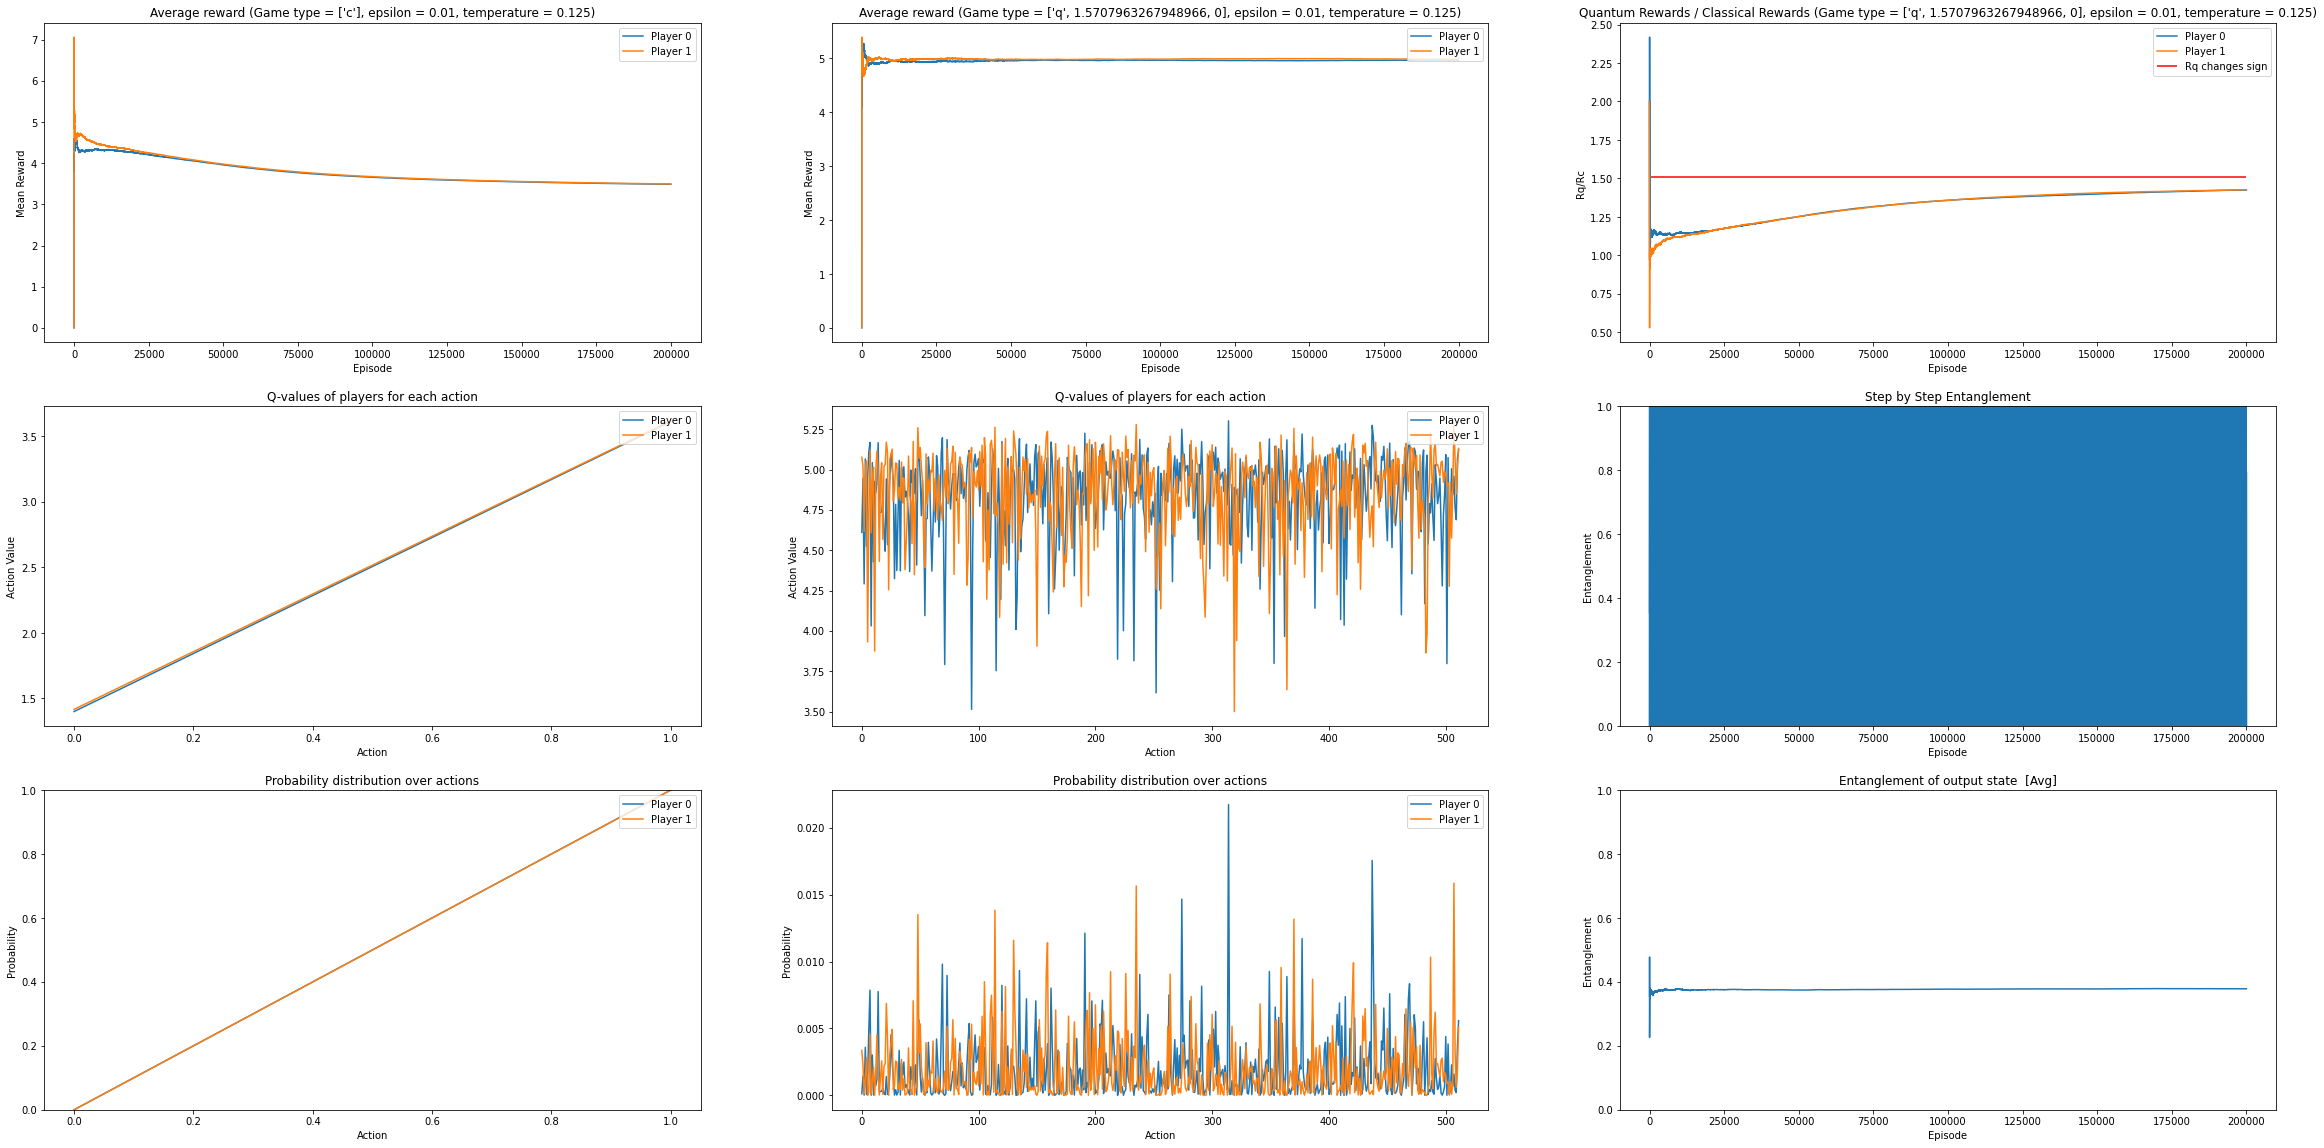

In [ ]:
index_q = 1

fig0, axs = plt.subplots(3, 3, figsize=(40,20))
for i in range(players):
    axs[0,0].plot(rewards_avg[0][i], label="Player {}".format(i))
    axs[1,0].plot(q_table[0][i], label="Player {}".format(i))    
    axs[2,0].plot(act_pro[0][i], label="Player {}".format(i))   
    axs[0,1].plot(rewards_avg[index_q][i], label="Player {}".format(i))
    axs[1,1].plot(q_table[index_q][i], label="Player {}".format(i))    
    axs[2,1].plot(act_pro[index_q][i], label="Player {}".format(i)) 
    axs[0,2].plot(rewards_avg[index_q][i] / rewards_avg[0][i], label="Player {}".format(i)) 
 
axs[0,0].set_title("Average reward ({})".format(title_label[0]))
axs[0,0].set_xlabel("Episode")
axs[0,0].set_ylabel("Mean Reward")
axs[0,0].legend(loc='upper right')
#axs[0,0].set_ylim(0, 10)

axs[1,0].set_title("Q-values of players for each action")
axs[1,0].set_ylabel("Action Value")
axs[1,0].set_xlabel("Action")
axs[1,0].legend(loc='upper right')
#axs[1,0].set_ylim(0, 10)

axs[2,0].set_title("Probability distribution over actions")
axs[2,0].set_ylabel("Probability")
axs[2,0].set_xlabel("Action")
axs[2,0].legend(loc='upper right')
axs[2,0].set_ylim(0, 1)
      
axs[0,1].set_title("Average reward ({})".format(title_label[1]))
axs[0,1].set_xlabel("Episode")
axs[0,1].set_ylabel("Mean Reward")
axs[0,1].legend(loc='upper right')
#axs[0,1].set_ylim(0, 10)

axs[1,1].set_title("Q-values of players for each action")
axs[1,1].set_ylabel("Action Value")
axs[1,1].set_xlabel("Action")
axs[1,1].legend(loc='upper right')
#axs[1,1].set_ylim(0, 10)

axs[2,1].set_title("Probability distribution over actions")
axs[2,1].set_ylabel("Probability")
axs[2,1].set_xlabel("Action")
axs[2,1].legend(loc='upper right')
#axs[2,1].set_ylim(0, 1)
      
axs[0,2].set_title("Quantum Rewards / Classical Rewards ({})".format(title_label[1]))
axs[0,2].set_xlabel("Episode")
axs[0,2].set_ylabel("Rq/Rc")
hl = np.max([np.mean(rewards[index_q][0][5*tau:time])/np.mean(rewards[0][0][5*tau:time]), 
             np.mean(rewards[index_q][1][5*tau:time])/np.mean(rewards[0][1][5*tau:time])])
axs[0,2].hlines(hl, 0, time, color='red', label= 'Rq changes sign')
axs[0,2].legend()
#axs[0,2].set_ylim(-3, 1)

axs[1,2].plot(entanglements[index_q])  
axs[1,2].set_title("Step by Step Entanglement".format(title_label[0]))
axs[1,2].set_xlabel("Episode")
axs[1,2].set_ylabel("Entanglement")
axs[1,2].set_ylim(0, 1)

axs[2,2].plot(entanglements_avg[index_q]) 
axs[2,2].set_title("Entanglement of output state  [Avg]".format(title_label[0]))
axs[2,2].set_xlabel("Episode")
axs[2,2].set_ylabel("Entanglement") 
axs[2,2].set_ylim(0, 1)

plt.show()

In [ ]:
phi0 = []
phi1 = []
phi2 = []
for phis in all_actions:
  phi0.append(phis[0])  
  phi1.append(phis[1])  
  phi2.append(phis[2])  

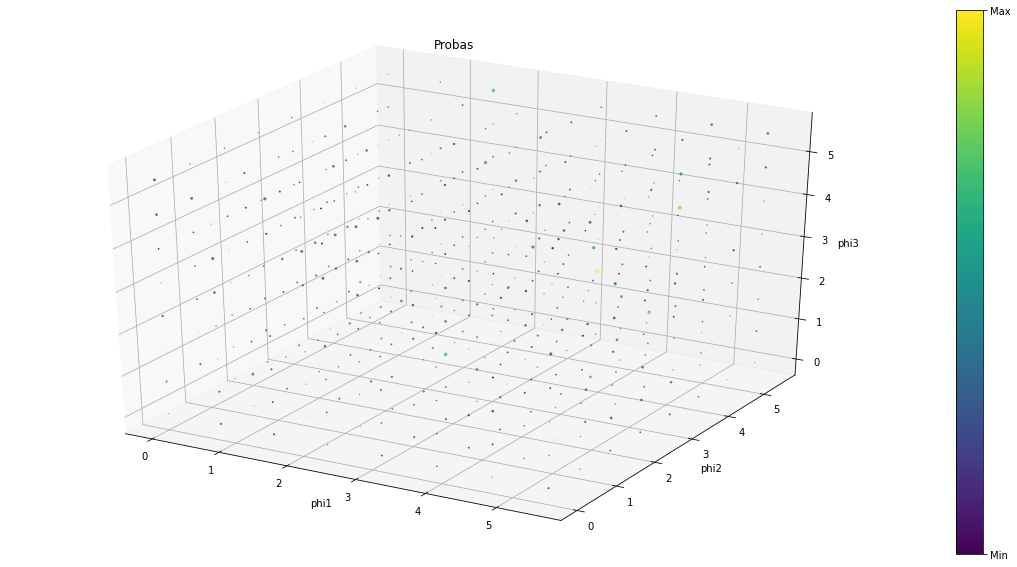

In [ ]:
probas = act_pro[1][0]
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Probas")
ax.set_xlabel("phi1")
ax.set_ylabel("phi2")
ax.set_zlabel("phi3")
scat_plot = ax.scatter(xs = phi0, ys = phi1, zs = phi2, s=500*probas, c=probas)
cb = plt.colorbar(scat_plot)
cb.set_ticks([np.min(probas),np.max(probas)])
cb.set_ticklabels(["Min", "Max"])
plt.show()

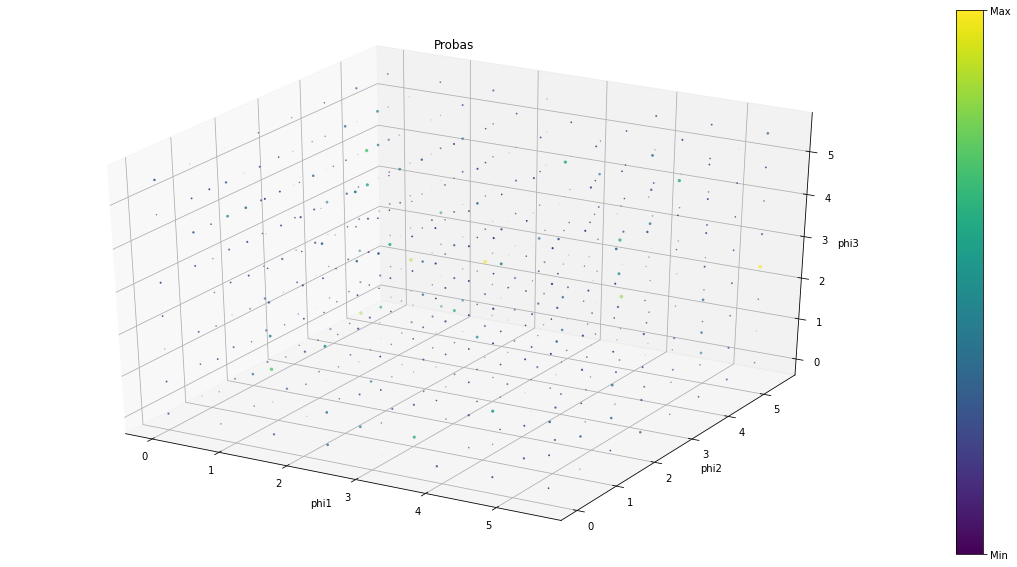

In [ ]:
probas = act_pro[1][1]
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Probas")
ax.set_xlabel("phi1")
ax.set_ylabel("phi2")
ax.set_zlabel("phi3")
scat_plot = ax.scatter(xs = phi0, ys = phi1, zs = phi2, s=500*probas, c=probas)
cb = plt.colorbar(scat_plot)
cb.set_ticks([np.min(probas),np.max(probas)])
cb.set_ticklabels(["Min", "Max"])
plt.show()

In [ ]:
#np.savetxt('probas_0.csv', act_pro[1][0], delimiter=',')
#np.savetxt('probas_1.csv', act_pro[1][1], delimiter=',')
#data = loadtxt('data.csv', delimiter=',')